Задание Ultra pro

Распознайте рукописную цифру, написанную на листе от руки.

Последовательность шагов:
1. На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер)
2. Фотографируем
3. Загружаем фото в Colaboratory.
4. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
5. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
6. Выполняем инверсию цветов, нормирование и решейп массива.
7. Выполняем распознавание собственной рукописной цифры.

In [ ]:
# Подключение всех необходимых библиотек 

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image

import pandas as pd  
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Обучение нейронной сети 

In [ ]:
# Загрузим данные MNIST
(x_train_org, y_train_org),(x_test_org, y_test_org)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


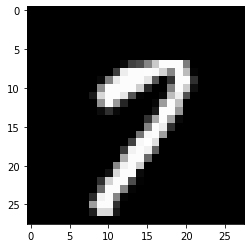

(28, 28)

In [ ]:
# Выбираем одну картинку для просмотра (просто для примера)
n = 9999
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB'))
plt.show()
x_train_org[n].shape

In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000,784)
x_test = x_test_org.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Нормализуем входные данные. В промежутке от 0 до 1
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.astype('float32')
x_test = x_test / 255

In [ ]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org,10)
y_test = utils.to_categorical(y_test_org,10)

In [ ]:
# Создаем нейронную сеть
model = Sequential()
model.add(Dense(100, input_dim = 784, activation = "relu"))
model.add(Dense(5000, activation = "relu"))
model.add(Dense(10,activation = "softmax"))

model.compile(loss="categorical_crossentropy" , optimizer ="adam", metrics = ["accuracy"])

# Обучение нейронной сети
model.fit (x_train, y_train, batch_size=128, epochs=15, verbose=1) 

Epoch 1/15
469/469 [==============================] - 8s 15ms/step - loss: 0.4537 - accuracy: 0.8667
Epoch 2/15
469/469 [==============================] - 7s 15ms/step - loss: 0.1067 - accuracy: 0.9670
Epoch 3/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0713 - accuracy: 0.9780
Epoch 4/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0508 - accuracy: 0.9832
Epoch 5/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0386 - accuracy: 0.9877
Epoch 6/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0300 - accuracy: 0.9901
Epoch 7/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0253 - accuracy: 0.9914
Epoch 8/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0227 - accuracy: 0.9923
Epoch 9/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0200 - accuracy: 0.9932
Epoch 10/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0182 - accura

# Проверка рукописных цифр

Ради примера будут поданы 4 набора из 10 цифр (40 примеров), написанными четыремя разными людьми. Чтобы было больше примеров для проверки сети.

Все цифры были написаны в каждой клеточке, отсканированы. 

Большое кол-во поданых данных нужны чтобы выяснить какие цифры определет лучше всего, а какие хуже.


Тест:  0


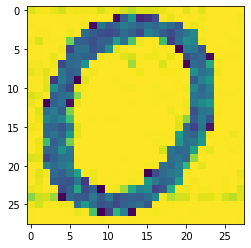

Ответ:  3

Тест:  1


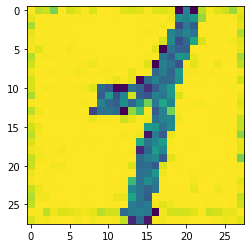

Ответ:  1

Тест:  2


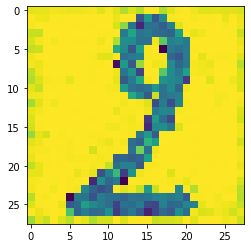

Ответ:  2

Тест:  3


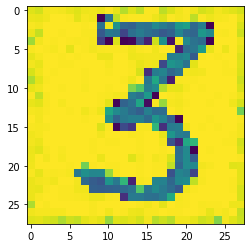

Ответ:  5

Тест:  4


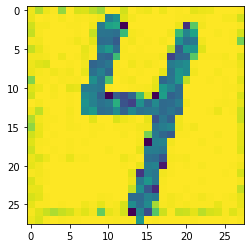

Ответ:  4

Тест:  5


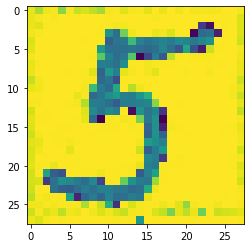

Ответ:  5

Тест:  6


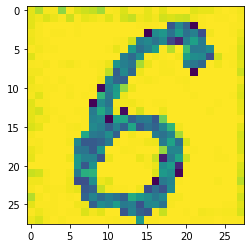

Ответ:  5

Тест:  7


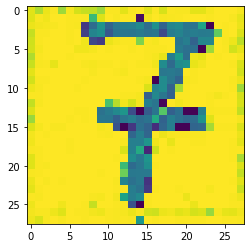

Ответ:  6

Тест:  8


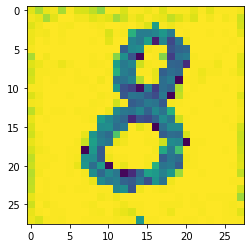

Ответ:  8

Тест:  9


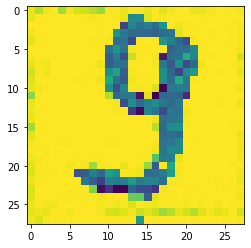

Ответ:  3

Тест:  10


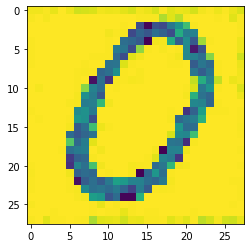

Ответ:  0

Тест:  11


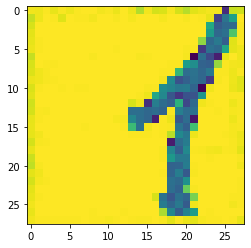

Ответ:  3

Тест:  12


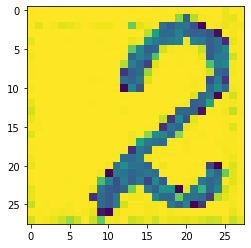

Ответ:  5

Тест:  13


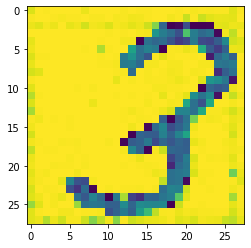

Ответ:  5

Тест:  14


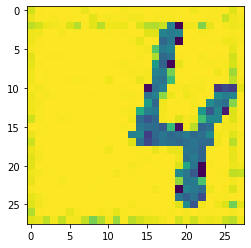

Ответ:  4

Тест:  15


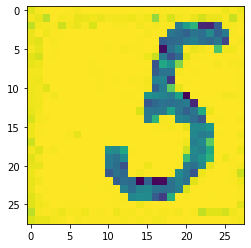

Ответ:  5

Тест:  16


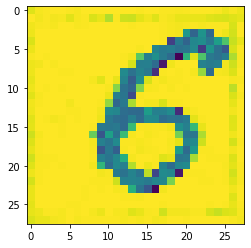

Ответ:  5

Тест:  17


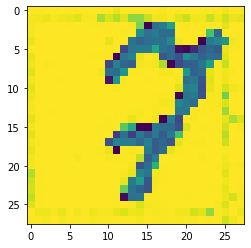

Ответ:  8

Тест:  18


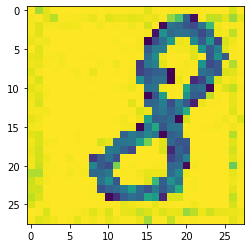

Ответ:  8

Тест:  19


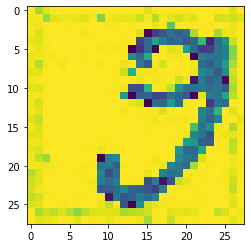

Ответ:  5

Тест:  20


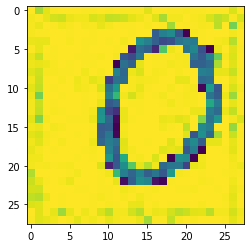

Ответ:  0

Тест:  21


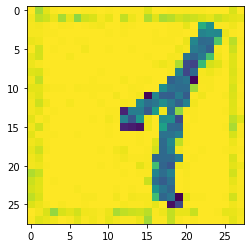

Ответ:  8

Тест:  22


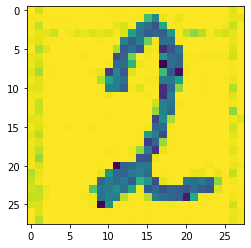

Ответ:  2

Тест:  23


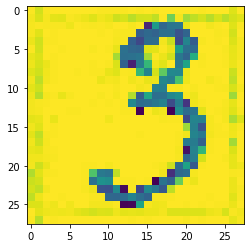

Ответ:  5

Тест:  24


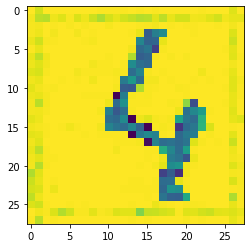

Ответ:  4

Тест:  25


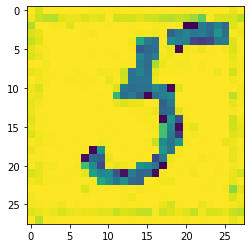

Ответ:  5

Тест:  26


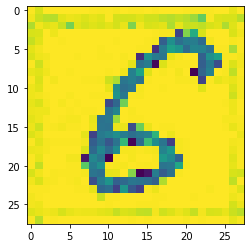

Ответ:  6

Тест:  27


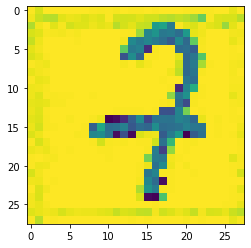

Ответ:  2

Тест:  28


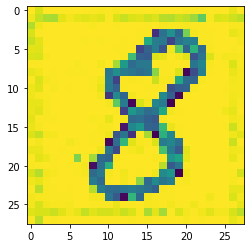

Ответ:  8

Тест:  29


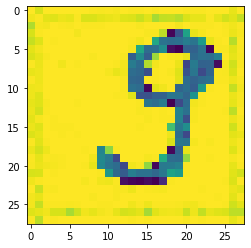

Ответ:  5

Тест:  30


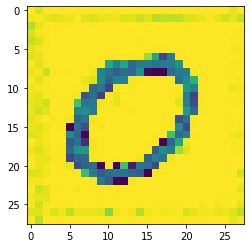

Ответ:  0

Тест:  31


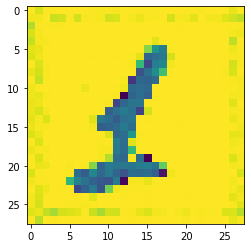

Ответ:  5

Тест:  32


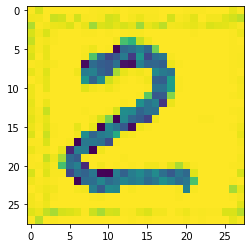

Ответ:  2

Тест:  33


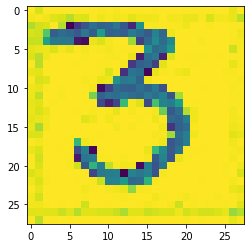

Ответ:  3

Тест:  34


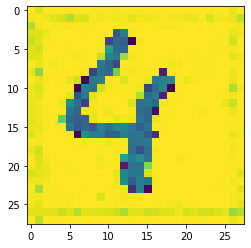

Ответ:  6

Тест:  35


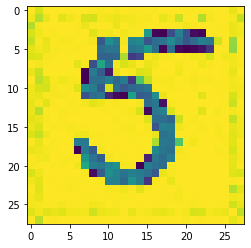

Ответ:  5

Тест:  36


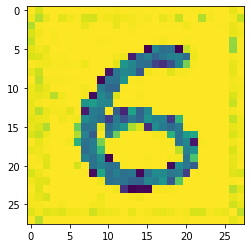

Ответ:  6

Тест:  37


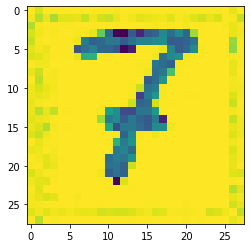

Ответ:  2

Тест:  38


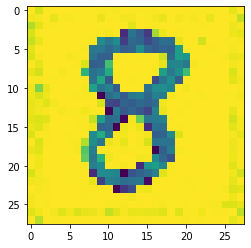

Ответ:  8

Тест:  39


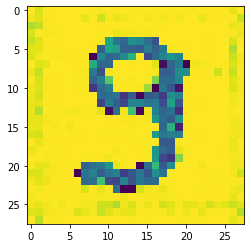

Ответ:  3


In [ ]:
# Чтобы не писать код под каждую цифру создадим цикл
for i in range (0,40):
  path = '/content/{}.jpg'.format(i)      # Файлы в формате jpg загружены в сеcсию колаб. Названия файлов (0.jpg, 1.jpg,2.jpg,....39.jpg)

  # Присваеваем картинку переменной, и так же сразу задаем размер 28х28
  numbers = image.load_img(path, target_size=(28,28), color_mode = "grayscale")
  # Подпишем каждый тест
  print ("\nТест: ",i)
  # Вывод изображения для наглядности 
  plt.imshow(numbers)
  plt.show()

  # Преобразуем изображение в numpy-массив
  numbers_arr = image.img_to_array(numbers)

  # Сделаем инверсию цвета
  numbers_arr = 255 - numbers_arr

  # Нормализуем входные картинки
  numbers_arr = numbers_arr.astype('float32')  # преобразовываем numbers_arr в тип float32
  numbers_arr = numbers_arr / 255              # делим на 255, чтобы диапазон был от 0 до 1

  # Меняем размер массива
  numbers_arr = numbers_arr.reshape(1,784)

  # Добавляем одну размерность в конце, чтобы нейронная сеть могла распознать пример
  numbers_arr = np.expand_dims(numbers_arr, axis = 0)

  # Распознаём наш пример 
  pred = model.predict(numbers_arr)

  # Вывод на экран предсказаная сети (максимальное значение в массиве pred)
  print ("Ответ: ", np.argmax(pred))

# Вывод:

Так как тестовая выборка очень мала (всего 40 примеров), то говорить о том с какой вероятностью определяется каждая цифра можно только с большой погрешностью. 

  Но не смотря на это сеть делает прогноз. 
  
  Есть цифры которые она определяет более точно, это: 5, 
  
  Менее точно: 0, 2, 4
  
  Хуже всего: 7 и 9 

  Вероятно цифры 5 и 8 определяет лучше всего, потому что они больше всех похожи на другие.

  Таблица с процентами точных ответов представлены в таблице ниже

In [ ]:
columns = ['0','1','2','3','4','5','6','7','8','9']
index= ['Процент правильных ответов']
data = [['75%', '25%', '75%', '25%', '75%', '100%', '50%', '0%', '100%', '0%']]
result = pd.DataFrame(data = data, columns = columns, index = index)
result

,0,1,2,3,4,5,6,7,8,9
Процент правильных ответов,75%,25%,75%,25%,75%,100%,50%,0%,100%,0%
